## Importing Libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler , PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle

## EDA

In [2]:
df = pd.read_csv("Desktop/Logistic-regression_final/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.describe(include="object")

,Gender
count,400
unique,2
top,Female
freq,204


In [11]:
encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df[["Gender"]])

In [13]:
df.drop(["User ID"], axis = 1, inplace = True)

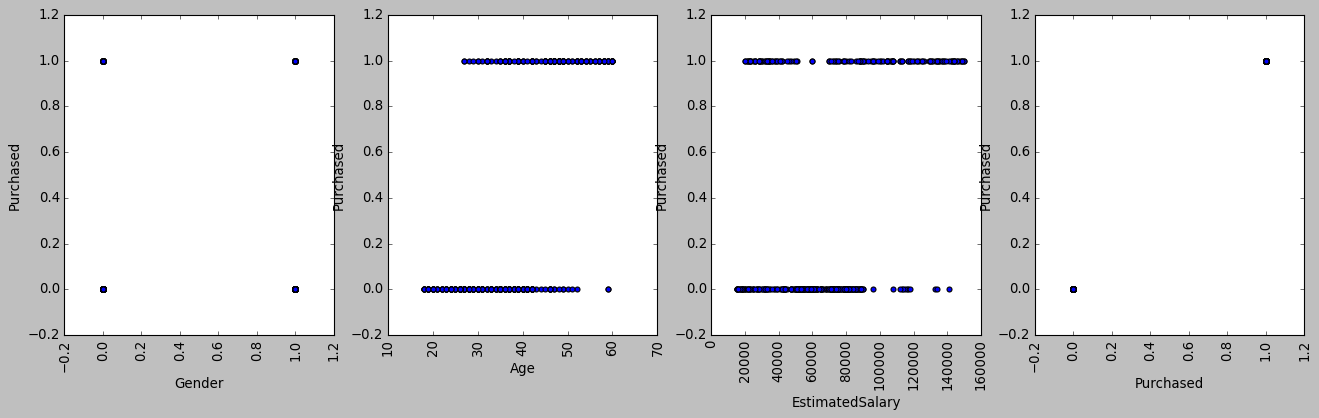

In [21]:
plt.style.use("classic")
fig = plt.figure(figsize=(20,5))
for i in range(len(df.columns)):
    plt.subplot(1,4,i+1)
    plt.scatter(df.iloc[:,i], df[["Purchased"]])
    plt.xlabel(df.columns[i])
    plt.ylabel("Purchased")
    plt.xticks(rotation = 90)

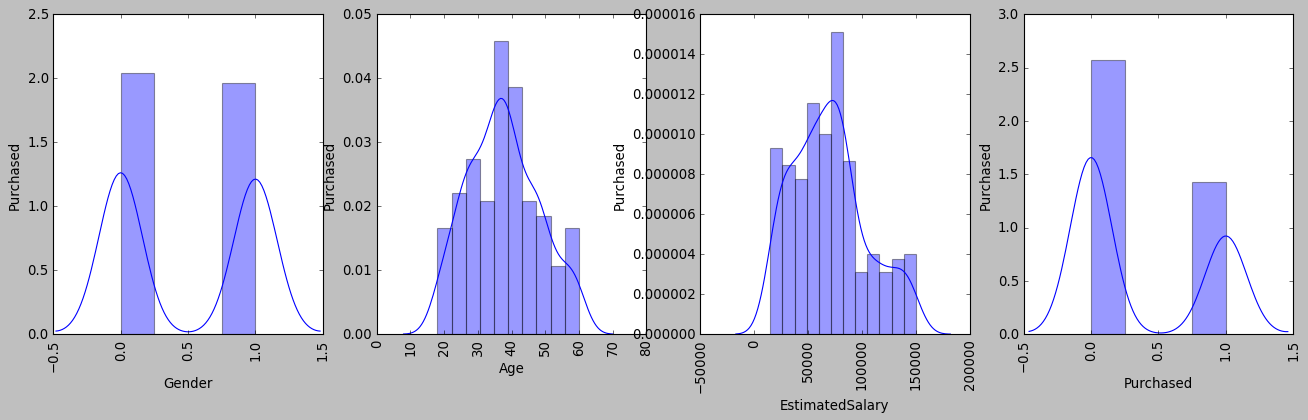

In [22]:
plt.style.use("classic")
fig = plt.figure(figsize=(20,5))
for i in range(len(df.columns)):
    plt.subplot(1,4,i+1)
    sns.distplot(df.iloc[:,i])
    plt.xlabel(df.columns[i])
    plt.ylabel("Purchased")
    plt.xticks(rotation = 90)

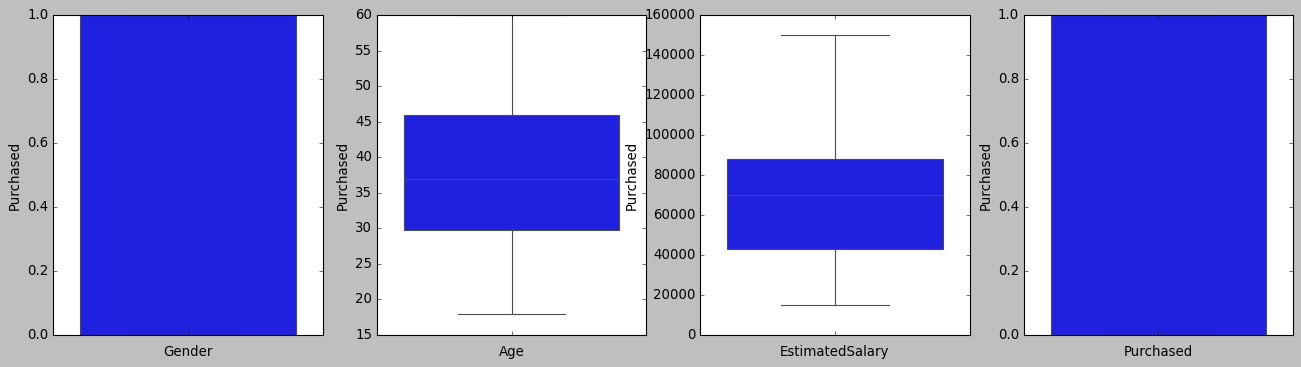

In [26]:
plt.style.use("classic")
fig = plt.figure(figsize=(20,5))
for i in range(len(df.columns)):
    plt.subplot(1,4,i+1)
    sns.boxplot(y = df.iloc[:,i])
    plt.xlabel(df.columns[i])
    plt.ylabel("Purchased")
    plt.xticks(rotation = 90)

In [34]:
zero = 0
one = 0
for i in df["Purchased"]:
    if(i == 0):
        zero += 1
    else:
        one += 1

In [35]:
zero

257

([<matplotlib.axis.XTick at 0x7fa0e4b93970>,
 <a list of 2 Text major ticklabel objects>)

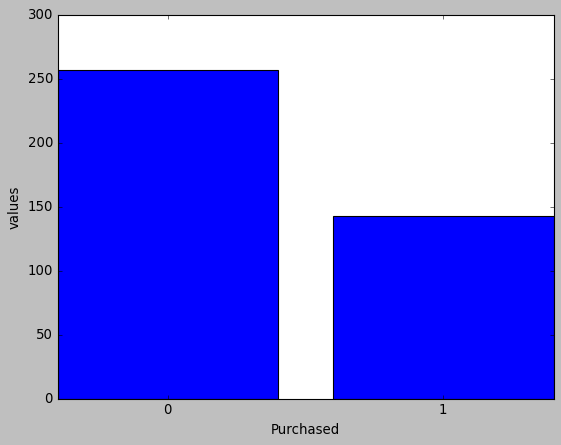

In [36]:
plt.bar(x = [0, 1], height=[zero, one])
plt.xlabel("Purchased")
plt.ylabel("values")
plt.xticks([0,1])

In [41]:
for i in range(100):
    df = df.append(df[df["Purchased"] == 1].iloc[i])

([<matplotlib.axis.XTick at 0x7fa0e4cb6fa0>,
 <a list of 2 Text major ticklabel objects>)

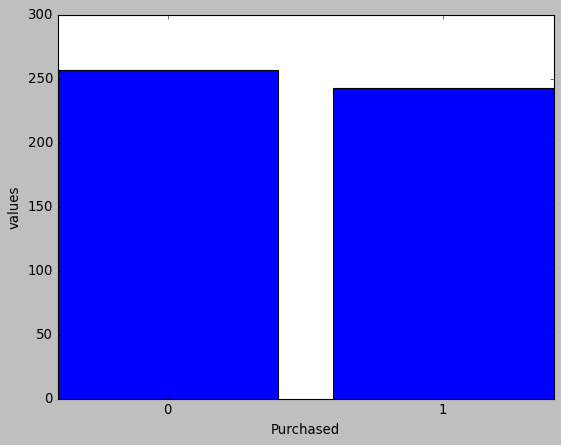

In [42]:
zero = 0
one = 0
for i in df["Purchased"]:
    if(i == 0):
        zero += 1
    else:
        one += 1
        
plt.bar(x = [0, 1], height=[zero, one])
plt.xlabel("Purchased")
plt.ylabel("values")
plt.xticks([0,1])

In [43]:
X = df.drop(["Purchased"], axis = 1)
y = df[["Purchased"]]

In [45]:
sc = StandardScaler()
x_scaled = sc.fit_transform(X)

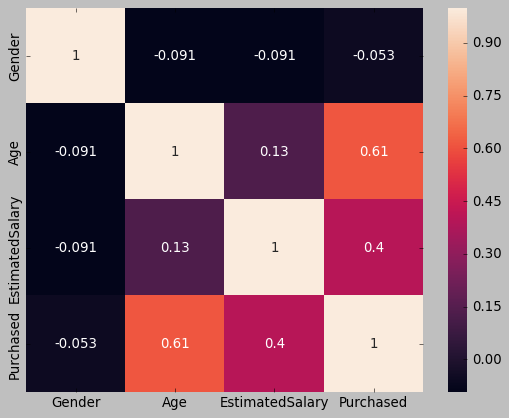

In [46]:
sns.heatmap(df.corr(), annot=True)

In [47]:
vif = []
for i in range(len(df.columns)):
    vif.append(variance_inflation_factor(np.array(df), i))
VIF = pd.DataFrame({"Features":df.columns, "VIF":vif})
VIF

,Features,VIF
0,Gender,1.775621
1,Age,6.147123
2,EstimatedSalary,4.698806
3,Purchased,2.799449


In [48]:
X = pd.DataFrame(x_scaled, columns=X.columns)
X

,Gender,Age,EstimatedSalary
0,1.040833,-1.900200,-1.516984
1,1.040833,-0.388355,-1.489875
2,-0.960769,-1.238768,-0.866360
3,-0.960769,-1.144278,-0.486829
4,1.040833,-1.900200,0.028248
...,...,...,...
495,-0.960769,0.840019,1.519261
496,1.040833,-0.293865,1.166840
497,-0.960769,0.745529,0.868637
498,-0.960769,0.840019,1.193949


In [49]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state = 101, test_size = 0.25)

In [50]:
print("Independent training feature", np.shape(x_train))
print("Dependent training feature", np.shape(y_train))
print("Independent testing feature", np.shape(x_test))
print("Dependent testing feature", np.shape(y_test))

Independent training feature (375, 3)
Dependent training feature (375, 1)
Independent testing feature (125, 3)
Dependent testing feature (125, 1)


## Selecting Model

In [51]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.832

In [52]:
lr = DecisionTreeClassifier()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.88

In [56]:
lr = RandomForestClassifier()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

<ipython-input-56-d0f5ad2d64fc>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  lr.fit(x_train, y_train)


0.896

In [57]:
lr = AdaBoostClassifier()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.88

In [60]:
lr = BaggingClassifier()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.872

## Fining and Tuning

In [63]:
deg = [1,2,3,4]
for i in deg:
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state = 101, test_size = 0.25)
    lr = RandomForestClassifier()
    lr.fit(x_train, y_train)
    print(lr.score(x_test, y_test))

<ipython-input-63-8f6bbe94be72>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  lr.fit(x_train, y_train)


0.896
0.904


<ipython-input-63-8f6bbe94be72>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  lr.fit(x_train, y_train)
<ipython-input-63-8f6bbe94be72>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  lr.fit(x_train, y_train)


0.904


<ipython-input-63-8f6bbe94be72>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  lr.fit(x_train, y_train)


0.904


In [64]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state = 101, test_size = 0.25)
lr = RandomForestClassifier()
lr.fit(x_train, y_train)
print(lr.score(x_test, y_test))

<ipython-input-64-cb151d81245b>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  lr.fit(x_train, y_train)


0.904


## Testing Results visualization

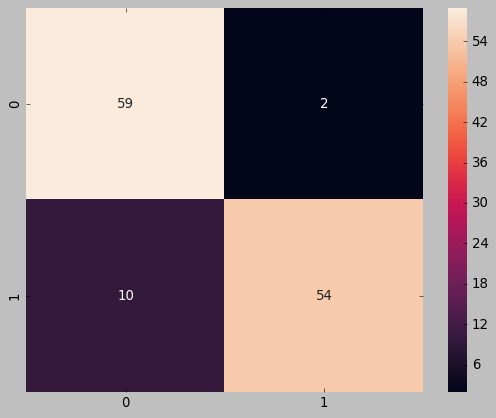

In [69]:
cm = confusion_matrix(lr.predict(x_test), y_test)
sns.heatmap(cm,annot=True)

In [71]:
print(classification_report(lr.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        61
           1       0.96      0.84      0.90        64

    accuracy                           0.90       125
   macro avg       0.91      0.91      0.90       125
weighted avg       0.91      0.90      0.90       125



In [72]:
roc_auc_score(lr.predict(x_test), y_test)

0.9054815573770492

In [73]:
fpr, tpr, threshold = roc_curve(lr.predict(x_test), y_test)

Text(0, 0.5, 'True Positive Rate')

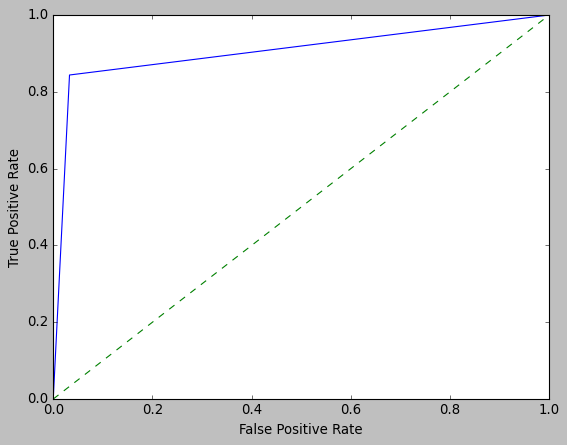

In [79]:
plt.plot(fpr, tpr)
plt.plot([0,1], linestyle = "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

## Saving model for deployment

In [65]:
pickle.dump(lr, open("Desktop/sale prediction/model.pickle", "wb"))
pickle.dump(sc, open("Desktop/sale prediction/scaler.pickle", "wb"))
pickle.dump(poly, open("Desktop/sale prediction/poly.pickle", "wb"))
pickle.dump(encoder, open("Desktop/sale prediction/encoder.pickle", "wb"))